In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
warnings.filterwarnings('ignore')
np.random.seed(42)

加载sklearn内置数据集

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
print(iris.DESCR)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ==========

对于传统逻辑回归，要对标签进行转换，属于当前类别为1，不属于当前类别为0.

In [3]:
X = iris['data'][:, 3].reshape(-1, 1)
y = (iris['target'] == 2).astype(np.int_)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

LogisticRegression()

随着输入特征数值的变化，结果概率值也会发生改变

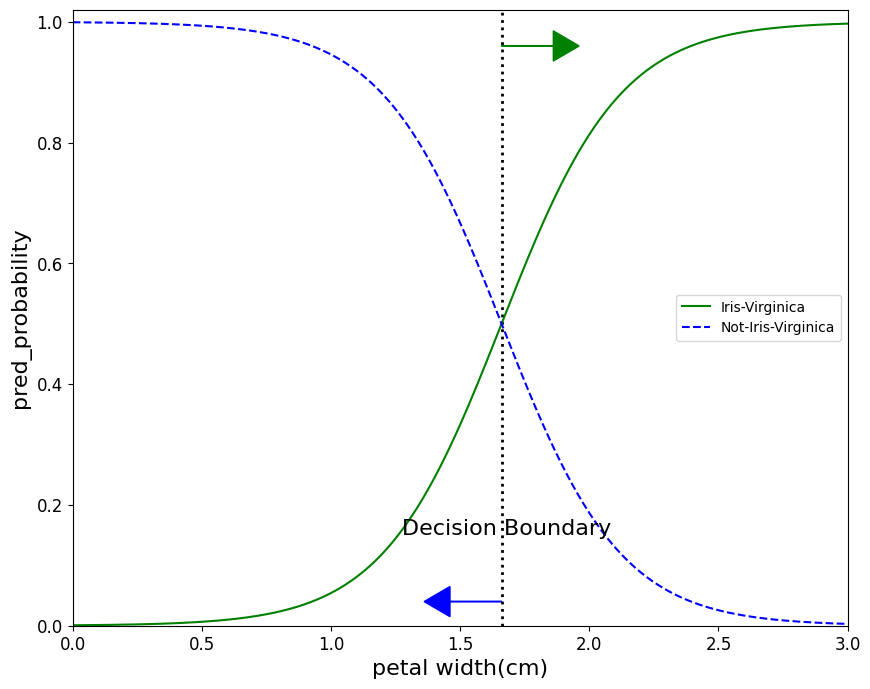

In [17]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = logistic_regression.predict_proba(X_new)
plt.figure(figsize = (10, 8))
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [0.00, 1.2], 'k:', linewidth = 2)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not-Iris-Virginica')
plt.arrow(decision_boundary[0], 0.04, -0.2, 0, head_width = 0.05, head_length = 0.1, fc = 'b', ec = 'b')
plt.arrow(decision_boundary[0], 0.96, 0.2, 0, head_width = 0.05, head_length = 0.1, fc = 'g', ec = 'g')
plt.text(decision_boundary + 0.02, 0.15, 'Decision Boundary', fontsize = 16, color = 'k', ha = 'center')
plt.xlabel('petal width(cm)' ,fontsize = 16)
plt.ylabel('pred_probability' ,fontsize = 16)
plt.axis([0, 3, 0.00 ,1.02])
plt.legend(loc = 'best')

In [63]:
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.int_)

In [64]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(C=1000)
logistic_regression.fit(X, y)

LogisticRegression(C=1000)

In [65]:
X[:, 0].min(), X[:, 0].max()

(np.float64(1.0), np.float64(6.9))

In [66]:
X[:, 1].min(), X[:, 1].max()

(np.float64(0.1), np.float64(2.5))

#### 决策边界的绘制
- 构建坐标数据，确保数据在合理的范围内，根据实际训练时输入的数据来决定
- 整合坐标点，得到所有测试输入数据的坐标
- 预测，得到所有点的概率值
- 绘制等高线，完成决策边界

In [67]:
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1), np.linspace(0.8, 2.7, 200).reshape(-1, 1))
print(x0)
print(x1)

[[2.9        2.90821643 2.91643287 ... 6.98356713 6.99178357 7.        ]
 [2.9        2.90821643 2.91643287 ... 6.98356713 6.99178357 7.        ]
 [2.9        2.90821643 2.91643287 ... 6.98356713 6.99178357 7.        ]
 ...
 [2.9        2.90821643 2.91643287 ... 6.98356713 6.99178357 7.        ]
 [2.9        2.90821643 2.91643287 ... 6.98356713 6.99178357 7.        ]
 [2.9        2.90821643 2.91643287 ... 6.98356713 6.99178357 7.        ]]
[[0.8        0.8        0.8        ... 0.8        0.8        0.8       ]
 [0.80954774 0.80954774 0.80954774 ... 0.80954774 0.80954774 0.80954774]
 [0.81909548 0.81909548 0.81909548 ... 0.81909548 0.81909548 0.81909548]
 ...
 [2.68090452 2.68090452 2.68090452 ... 2.68090452 2.68090452 2.68090452]
 [2.69045226 2.69045226 2.69045226 ... 2.69045226 2.69045226 2.69045226]
 [2.7        2.7        2.7        ... 2.7        2.7        2.7       ]]


In [68]:
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new.shape

(100000, 2)

In [69]:
y_pred_proba = logistic_regression.predict_proba(X_new)

Text(6, 2.4, 'Iris-Virginica')

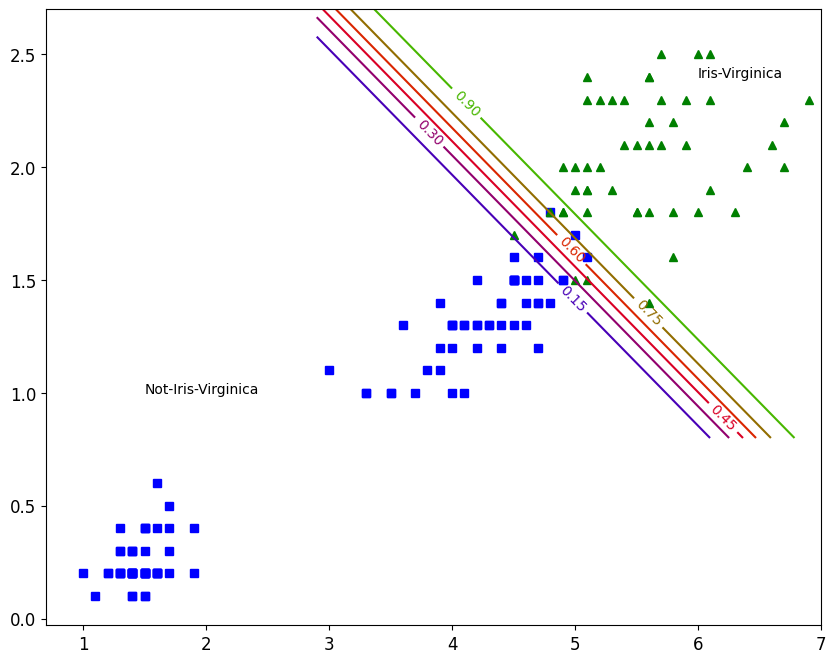

In [71]:
plt.figure(figsize = (10, 8))
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')
z1 = y_pred_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, z1, cmap = plt.cm.brg)
plt.clabel(contour)
plt.text(1.5, 1, s = 'Not-Iris-Virginica')
plt.text(6, 2.4, s = 'Iris-Virginica')

In [72]:
X = iris['data'][:, (2, 3)]
y = iris['target']

In [73]:
softmax_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_regression.fit(X, y)


LogisticRegression(multi_class='multinomial')

In [74]:
softmax_regression.predict([[5, 2]])

array([2])

In [75]:
softmax_regression.predict_proba([[5, 2]])

array([[2.43199208e-04, 2.14948752e-01, 7.84808048e-01]])

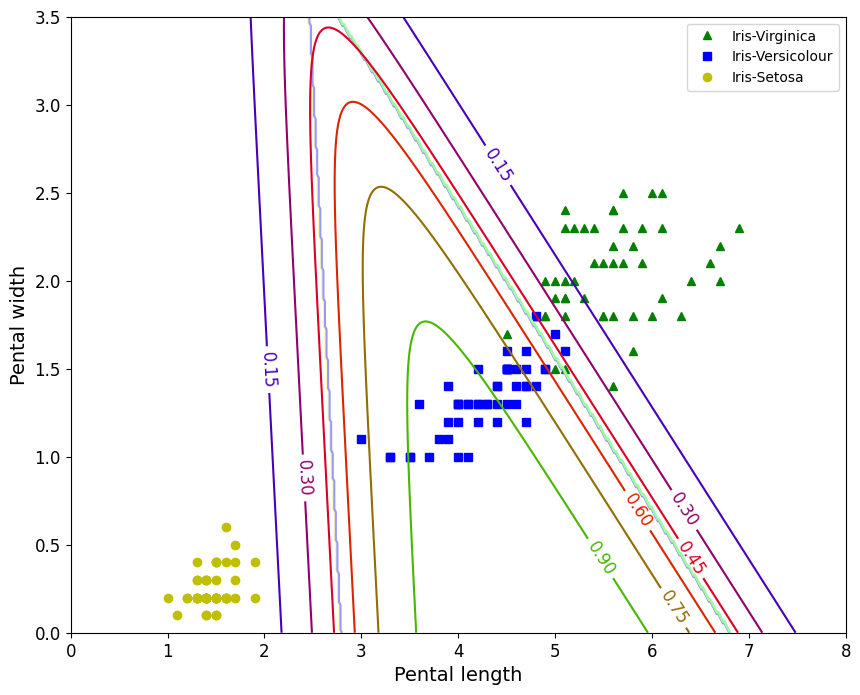

In [76]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1), np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_pred_proba = softmax_regression.predict_proba(X_new)
y_pred = softmax_regression.predict(X_new)

z2 = y_pred_proba[:, 1].reshape(x0.shape)
z3 = y_pred.reshape(x0.shape)
plt.figure(figsize = (10, 8))
plt.plot(X[y == 2, 0], X[y == 2, 1], 'g^', label = 'Iris-Virginica')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', label = 'Iris-Versicolour')
plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', label = 'Iris-Setosa')

from matplotlib.colors import ListedColormap
custom_cap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.contour(x0, x1, z3, cmap = custom_cap)
contour = plt.contour(x0, x1, z2, cmap = plt.cm.brg)
plt.clabel(contour, inline = 1, fontsize = 12)
plt.xlabel('Pental length', fontsize = 14)
plt.ylabel('Pental width', fontsize = 14)
plt.legend()
plt.show()